In [1]:
from skimage import io
from PIL import Image
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, img_as_float
import numpy as np

C:\Users\Zosia\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## 1. Data exploration

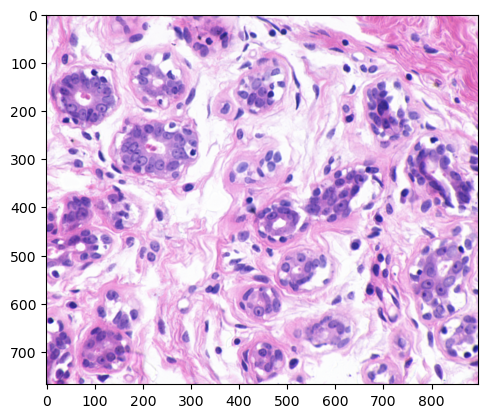

In [11]:
img = io.imread("Images Data\ytma10_010704_benign1_ccd.tif")
plt.imshow(img)

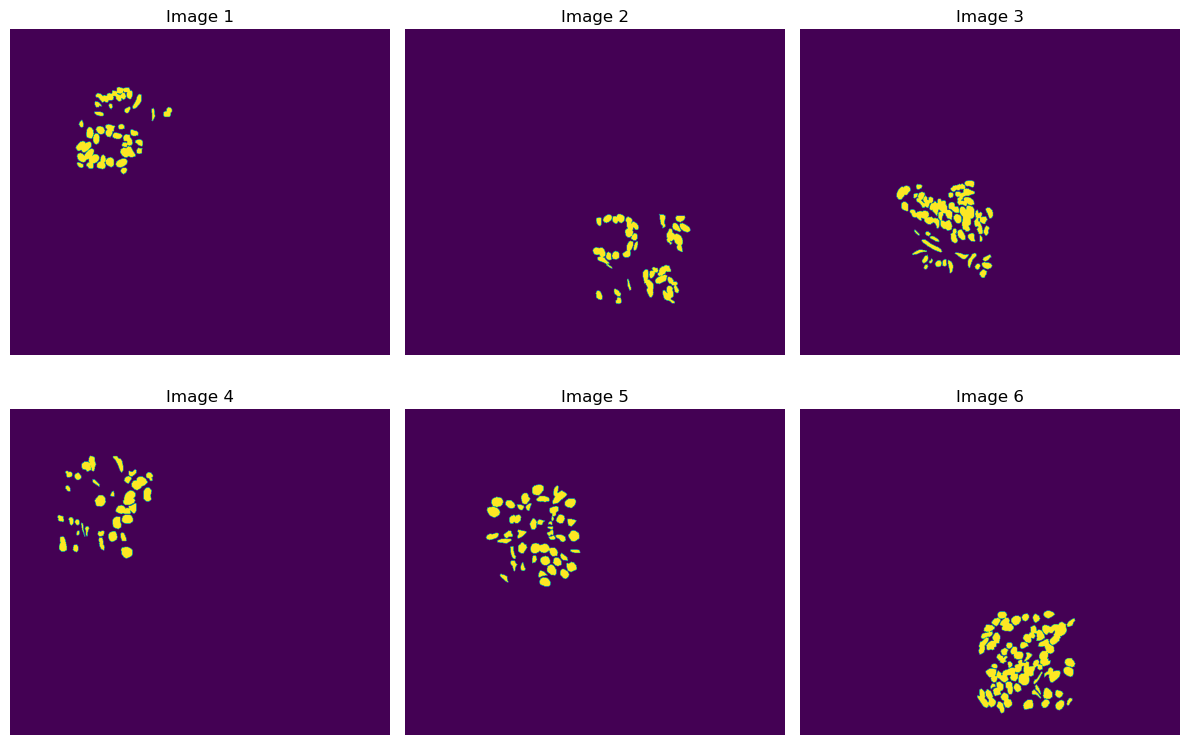

In [17]:
img_paths = [
    "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_benign1.TIF",
    "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_benign2.TIF",
    "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_benign3.TIF",
    "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_malignant1.TIF",
    "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_malignant2.TIF",
    "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_malignant3.TIF"
]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    img = io.imread(img_paths[i]) 
    ax.imshow(img)  
    ax.axis('off') 
    ax.set_title(f"Image {i+1}") 

plt.tight_layout()
plt.show() 

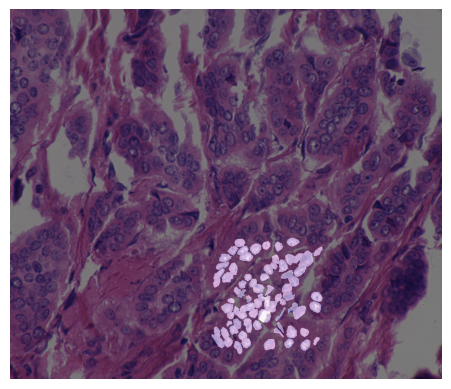

In [15]:

photo_path = "Images Data/ytma10_010704_malignant3_ccd.tif"
photo = io.imread(photo_path)

mask_path = "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_malignant3.TIF"
mask = io.imread(mask_path)

mask_expanded = np.expand_dims(mask, axis=2)

photo_float = img_as_float(photo)
mask_float = img_as_float(mask_expanded)

alpha = 0.5 
blended_img = alpha * photo_float + (1 - alpha) * mask_float

plt.imshow(blended_img)
plt.axis('off')
plt.show()


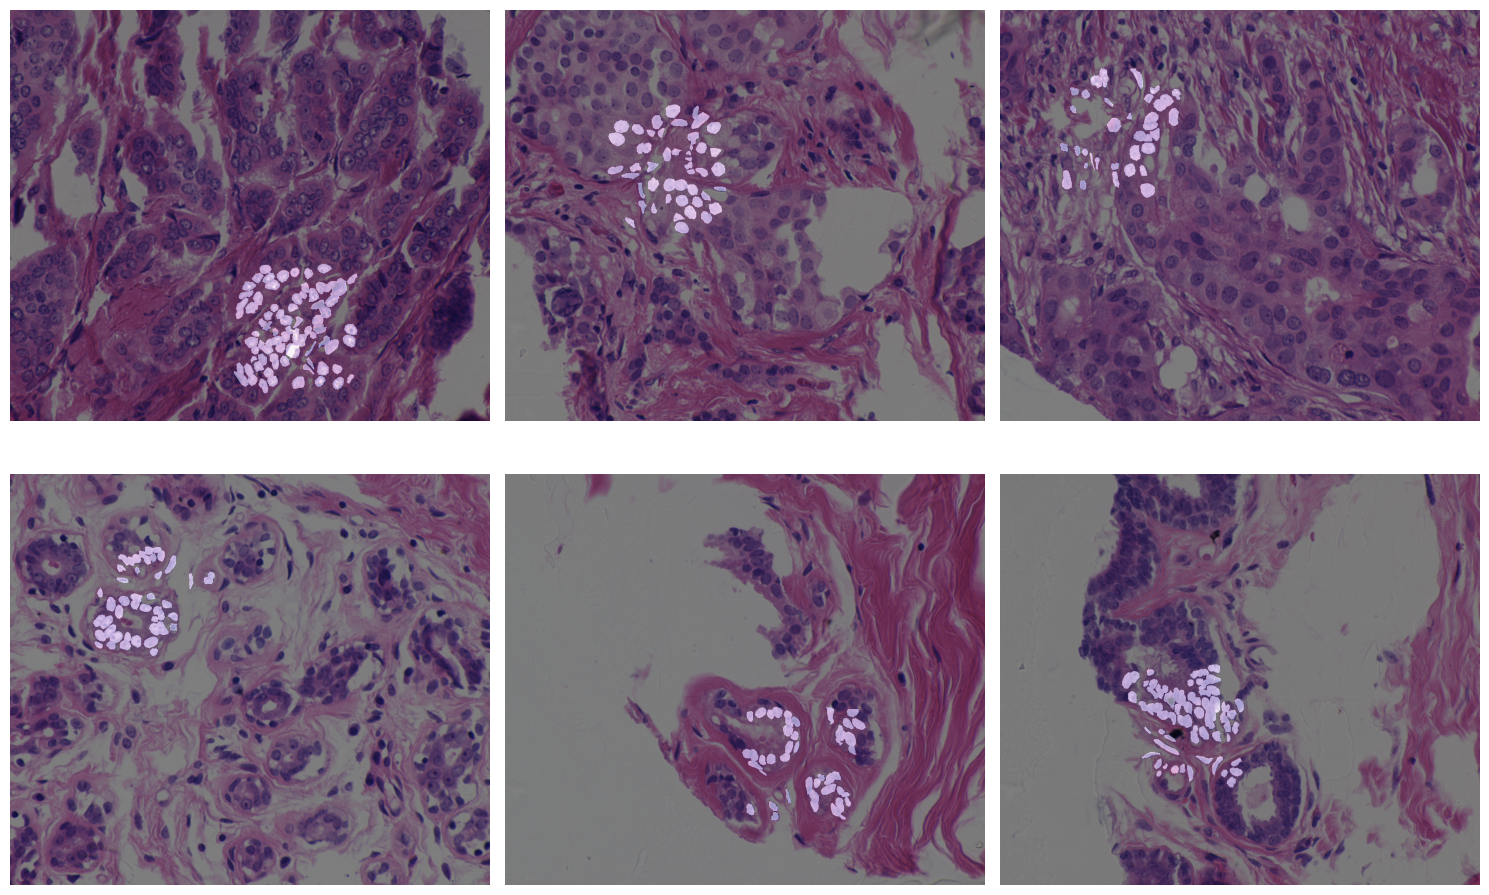

In [18]:
def blend_images(photo_path, mask_path, ax, alpha=0.5):
    photo = io.imread(photo_path)

    mask = io.imread(mask_path)

    mask_expanded = np.expand_dims(mask, axis=2)

    photo_float = img_as_float(photo)
    mask_float = img_as_float(mask_expanded)

    blended_img = alpha * photo_float + (1 - alpha) * mask_float

    ax.imshow(blended_img)
    ax.axis('off')

image_pairs = [
    {
        "photo": "Images Data/ytma10_010704_malignant3_ccd.tif",
        "mask": "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_malignant3.TIF"
    },
    {
        "photo": "Images Data/ytma10_010704_malignant2_ccd.tif",
        "mask": "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_malignant2.TIF"
    },
    {
        "photo": "Images Data/ytma10_010704_malignant1_ccd.tif",
        "mask": "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_malignant1.TIF"
    },
    {
        "photo": "Images Data/ytma10_010704_benign1_ccd.tif",
        "mask": "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_benign1.TIF"
    },
    {
        "photo": "Images Data/ytma10_010704_benign2_ccd.tif",
        "mask": "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_benign2.TIF"
    },
    {
        "photo": "Images Data/ytma10_010704_benign3_ccd.tif",
        "mask": "C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_benign3.TIF"
    },
]

num_pairs = len(image_pairs)
num_cols = 3
num_rows = (num_pairs - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, pair in enumerate(image_pairs):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    blend_images(pair["photo"], pair["mask"], ax)

plt.tight_layout()
plt.show()

In [21]:
pd.read_xml("C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Images/ytma10_010704_benign1_ccd.tif.xml")

,name,type,value
0,name,char,ytma10_010704_benign1_ccd.tif
1,experimenter,char,David L. Rimm
2,image_type,char,breast cells
3,status,char,benign
4,staining,char,H&E
5,method,char,CCD
6,GroundTruth_Layers,char,https://bisque.ece.ucsb.edu/data_service/00-eB...
7,dataset_label,char,breast_cancer_cell_ground_truth
8,geometry,None,"896,768,1,1,3"
9,sha1,None,2ff50e62e0e27e3d9ac8658e5f1374b4652f4e7e


In [22]:
pd.read_xml("C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Images/ytma10_010704_benign1_ccd.tif.xml")["value"].T

0                        ytma10_010704_benign1_ccd.tif
1                                        David L. Rimm
2                                         breast cells
3                                               benign
4                                                  H&E
5                                                  CCD
6    https://bisque.ece.ucsb.edu/data_service/00-eB...
7                      breast_cancer_cell_ground_truth
8                                        896,768,1,1,3
9             2ff50e62e0e27e3d9ac8658e5f1374b4652f4e7e
Name: value, dtype: object

In [23]:
pd.read_xml("C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_benign1.TIF.xml")

,name,type,value
0,name,char,ytma10_010704_benign1.TIF
1,image,char,https://bisque.ece.ucsb.edu/data_service/00-XK...
2,geometry,None,"896,768,1,1,1"
3,sha1,None,f9a06a0a751af476d01d1a08f79960426542121a


In [7]:
pd.read_xml("C:/Users/Zosia/Desktop/SEM 4/WB/archive (1)/Data/Masks/ytma10_010704_benign1.TIF.xml")["value"].T

0                            ytma10_010704_benign1.TIF
1    https://bisque.ece.ucsb.edu/data_service/00-XK...
2                                        896,768,1,1,1
3             f9a06a0a751af476d01d1a08f79960426542121a
Name: value, dtype: object

## 2. Pre-processing
For this part of the project we will only be using "Images" as our data.

### Patch extraction

In [52]:
#pip install patchify
import os
import random
import shutil
import numpy as np
from patchify import patchify
from PIL import Image
import os
import random
import csv

In [53]:
input_folder = "Images_Data"
output_folder = "Patches_Data"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".TIF") or filename.endswith(".tif"):
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)
        folder = os.path.splitext(filename)[0]
        ocean = np.asarray(image)
        patches = patchify(ocean, (128, 128, 3), 128)
        nrows = 7
        ncols = 6

        for i in range(patches.shape[0]):
            for j in range(patches.shape[1]):
                patch = patches[i, j, 0]
                patch = Image.fromarray(patch)
                num = (i * patches.shape[1] + j) + 1
                col = (num % ncols) if (num % ncols) != 0 else ncols
                row = (num // ncols) if (num % ncols) != 0 else (num // ncols) - 1
                
                output_folder_path = os.path.join(output_folder, folder)
                os.makedirs(output_folder_path, exist_ok=True)
            
                patch.save(os.path.join(output_folder_path, f"{row}_{col}.png"))
        
        output_path = os.path.join(output_folder, folder, f"{folder}.png")
        image.save(output_path, format="PNG")


In [13]:
import os
import random
import shutil

    
# Path to the folder containing interior image folders
source_folder = 'Patches_Data_Correct'

# Path to the folder where you want to save the selected images
destination_folder = 'Data/Selected_5_Random'
os.makedirs(destination_folder, exist_ok=True)

# Function to select and copy 5 random images from each folder
def select_and_copy_images(source_folder, destination_folder):
    # Iterate through each folder in the source directory
    for folder in os.listdir(source_folder):
        folder_path = os.path.join(source_folder, folder)
        if os.path.isdir(folder_path):
            # Create a new folder in the destination directory
            new_folder_path = os.path.join(destination_folder, folder)
            os.makedirs(new_folder_path, exist_ok=True)
            # List all images in the current folder
            images = [file for file in os.listdir(folder_path) if file.endswith(('png'))]
            # Randomly select 5 images
            selected_images = random.sample(images, min(5, len(images)))
            # Copy selected images to the new folder
            for image in selected_images:
                source_image_path = os.path.join(folder_path, image)
                destination_image_path = os.path.join(new_folder_path, image)
                shutil.copyfile(source_image_path, destination_image_path)
                #print(f"Copied {image} to {new_folder_path}")

# Call the function to perform the task
select_and_copy_images(source_folder, destination_folder)


In [2]:
import os
import random
import shutil
import csv

#wybieranie patchy z obszarów oznaczonych maskami
    
# Path to the folder containing interior image folders
source_folder = 'Masks/PatchesIsMask/Mask'

# Path to the folder where you want to save the selected images
destination_folder = 'Data/Selected_5_Masks_50'
os.makedirs(destination_folder, exist_ok=True)

# Function to select and copy 5 random images from each folder
def select_and_copy_images(source_folder, destination_folder):
    # Iterate through each folder in the source directory
    for folder in os.listdir(source_folder):
        folder_path = os.path.join(source_folder, folder)
        folder_path3 = os.path.join('PatchesBackground_50', 'NotBackground', (folder + "_ccd"))
        if os.path.isdir(folder_path):
            # Create a new folder in the destination directory
            new_folder_path = os.path.join(destination_folder, folder)
            os.makedirs(new_folder_path, exist_ok=True)
            # List all images in the current folder
            images = [file for file in os.listdir(folder_path) if file.endswith(('png'))]
            images2 = [file for file in os.listdir(folder_path3) if (file.endswith(('png')) and file not in images)]
            # Randomly select 5 images if there is at least 5 images in the folder
            if len(images) >= 5:
                selected_images = random.sample(images, 5)
            else:
                selected_images = images
                additional_images = random.sample(images2, 5 - len(images))
                selected_images.extend(additional_images)
                #make sure that there are no duplicates
                selected_images = list(set(selected_images))
            # Copy selected images to the new folder
            for image in selected_images:
                folder_path2 = os.path.join('Patches_Data_Correct', (folder + "_ccd"))
                source_image_path = os.path.join(folder_path2, image)
                destination_image_path = os.path.join(new_folder_path, image)
                shutil.copyfile(source_image_path, destination_image_path)
                #print(f"Copied {image} to {new_folder_path}")

# Call the function to perform the task
select_and_copy_images(source_folder, destination_folder)


In [4]:
#in Data create a Train and Test folder
import os
import random
import shutil
import csv

# Path to the folder containing interior image folders
source_folder = 'Data/Selected_5_Masks_50'

# Path to the folder where you want to save the selected images
destination_folder = 'Data/Selected_5_Masks_50/Train'
os.makedirs(destination_folder, exist_ok=True)


# Function to copy images whose names are in the csv file
def copy_images(source_folder, destination_folder):
    csv_files = open('Data/train_folders.csv', 'r').read().split('\n')
    print(csv_files)
    # Iterate through each folder in the source directory
    for folder in os.listdir(source_folder):
        folder_path = os.path.join(source_folder, folder)
        #check if the folder is a directory and if name of the folder is in the csv file
        if os.path.isdir(folder_path) and folder.removesuffix("_ccd") in csv_files:
            # Create a new folder in the destination directory
            new_folder_path = os.path.join(destination_folder, folder)
            os.makedirs(new_folder_path, exist_ok=True)
            # List all images in the current folder
            images = [file for file in os.listdir(folder_path) if file.endswith(('png'))]
            # Copy selected images to the new folder
            for image in images:
                source_image_path = os.path.join(folder_path, image)
                destination_image_path = os.path.join(new_folder_path, image)
                shutil.copyfile(source_image_path, destination_image_path)
                #print(f"Copied {image} to {new_folder_path}")

# Call the function to perform the task
copy_images(source_folder, destination_folder)


['ytma10_010704_benign1', 'ytma10_010704_benign2', 'ytma10_010704_malignant1', 'ytma10_010704_malignant3', 'ytma12_010804_benign1', 'ytma12_010804_benign2', 'ytma12_010804_benign3', 'ytma12_010804_malignant1', 'ytma12_010804_malignant2', 'ytma12_010804_malignant3', 'ytma23_022103_benign1', 'ytma23_022103_benign3', 'ytma23_022103_malignant2', 'ytma49_042003_benign1', 'ytma49_042003_benign3', 'ytma49_042003_malignant1', 'ytma49_042003_malignant2', 'ytma49_042203_benign1', 'ytma49_042203_benign2', 'ytma49_042203_malignant1', 'ytma49_042203_malignant2', 'ytma49_042203_malignant3', 'ytma49_042403_benign1', 'ytma49_042403_benign3', 'ytma49_042403_malignant1', 'ytma49_042403_malignant2', 'ytma49_072303_benign1', 'ytma49_072303_benign2', 'ytma49_072303_malignant2', 'ytma49_111003_benign1', 'ytma49_111003_benign2', 'ytma49_111003_malignant1', 'ytma49_111003_malignant2', 'ytma49_111003_malignant3', 'ytma49_111303_benign3', 'ytma49_111303_malignant2', 'ytma49_111303_malignant3', 'ytma55_030603_be

In [4]:
import os
from sklearn.model_selection import train_test_split
import shutil
import signal

# Path to the folder containing interior image folders
source_folder = 'Patches_Data_Correct'

# Path to the folder where you want to save the selected images
destination_folder = 'Data'
os.makedirs(destination_folder, exist_ok=True)

# Function to select and copy images, and split them into training and testing sets
def select_copy_and_split_images(source_folder, destination_folder, test_size=0.3):
    # Disable timeout for copying operation
    signal.alarm(0)
    
    # Iterate through each folder in the source directory
    for folder in os.listdir(source_folder):
        folder_path = os.path.join(source_folder, folder)
        if os.path.isdir(folder_path):
            # List all images in the current folder
            images = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('png'))]
            # Split images into training and testing sets
            train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
            # Create new folders for training and testing sets
            train_folder_path = os.path.join(destination_folder, 'Train', folder)
            test_folder_path = os.path.join(destination_folder, 'Test', folder)
            os.makedirs(train_folder_path, exist_ok=True)
            os.makedirs(test_folder_path, exist_ok=True)
            # Copy selected images to the new folders
            for image in train_images:
                shutil.copy(image, os.path.join(train_folder_path, os.path.basename(image)))
            for image in test_images:
                shutil.copy(image, os.path.join(test_folder_path, os.path.basename(image)))
    
    # Reset the alarm after copying is done
    signal.alarm(0)

# Call the function to perform the task
select_copy_and_split_images(source_folder, destination_folder)


In [46]:
#make a list of all folders inside the directory and save to csv
import os
import csv

# Path to the folder containing interior image folders
source_folder = 'Data/Patches_Data_Correct'

# Path to the CSV file where you want to save the list of folders
csv_file = 'Data/files_before_split.csv'

# Function to create a list of folders and save it to a CSV file
def create_folder_list(source_folder):
    # List all folders in the source directory
    folders = [folder for folder in os.listdir(source_folder) if os.path.isdir(os.path.join(source_folder, folder))]
    beningn = []
    malignant = []
    train = []
    test = []
    for folder in folders:
        #if in the name  of folder is benign
        if 'beningn' in folder:
            beningn.append(folder)
        #if in the name  of folder is malignant
        else:
            malignant.append(folder)
    
    for folder in beningn:
        #randomly assign to train or test
        if random.random() < 0.7:
            train.append(folder)
        else:
            test.append(folder)
    for folder in malignant:
        #randomly assign to train or test
        if random.random() < 0.7:
            train.append([folder])
        else:
            test.append([folder])

    
    #save train and test folders to two separate csv files but not comma separated
    with open('Data/train_folders.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        for train in train:
            writer.writerow(train)
    with open('Data/test_folders.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        for test in test:
            writer.writerow(test)


create_folder_list(source_folder)

FileNotFoundError: [WinError 3] System nie może odnaleźć określonej ścieżki: 'Data/Patches_Data_Correct'

### Labels CSV creation

In [12]:
import os
import csv 

input_folder = "Data/Selected_5_NoBackground/Train"
output_csv = "Data/Selected_5_NoBackground/Train/labels.csv"

with open(output_csv, 'w', newline='') as csvfile:
    fieldnames = ['filename', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    
    for filename in os.listdir(input_folder):
        label = "benign" if "benign" in filename else "malignant"
        
        writer.writerow({'filename': filename, 'label': label})


The appropriate data hierarchy (for the SparseConvMIL algorithm) is located in the Selected_Data folder
(patch sizes 128 x 128 px, 5 patches extracted)